# K_NEAREST_NEIGHBOR

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as knc

In [16]:
data=pd.read_csv("E:\ANISH\DATA_SCIENCE\Files\diabetes.csv")

In [17]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
data["Outcome"].unique()

array([1, 0], dtype=int64)

Thus it is clear that graph reached a good point between the 18 and 20 of the K value and it continues to vary irregualarily w.r.t error rate.
Hence, let's take the value of k as 20.

REGRESSION

In [21]:

#creating the variables containing test data and train data
input_cols= data.iloc[:,0:8]
output_cols= data.iloc[:,8]


In [22]:
#importing the packages for splitting the  data
from sklearn.model_selection import train_test_split

#splitting the dataset into train and test data
xtrain,xtest,ytrain,ytest=train_test_split(input_cols,output_cols,test_size=0.2,random_state=0)


In [23]:
#Let's find the Error_rate to know the value of "k"
error_rate=[]
for i in range(1,40):
    knn=knc(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    predi=knn.predict(xtest)
    error_rate.append(np.mean(predi!= ytest))


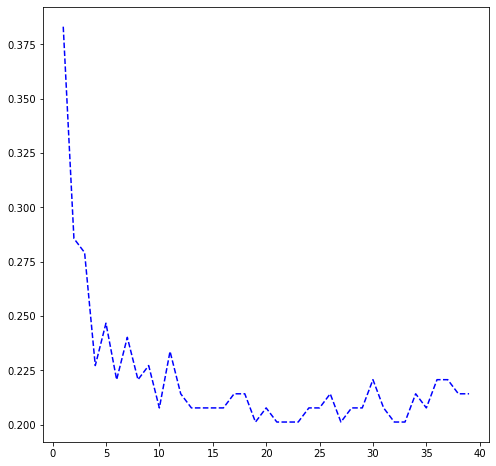

In [24]:
#Let's plot the error_rate

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.plot(range(1,40), error_rate, color="blue", linestyle= "dashed")



In [25]:
#importing the package of KNN Classifier
from sklearn.neighbors import KNeighborsClassifier as knc
dne=knc(n_neighbors=20)

In [26]:
#prediction
ypredict=dne.fit(xtrain,ytrain).predict(xtest)
ypredict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [27]:
#To find the Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypredict)
cm


array([[98,  9],
       [23, 24]], dtype=int64)

In [28]:
#To find the Accuracy 
from sklearn.metrics import accuracy_score
acc=accuracy_score(ytest,ypredict)
acc


0.7922077922077922